In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
pd.set_option('display.max_columns', None)

In [2]:
def quantify_missing_data_by_group(data, feature_group):
    """
    Quantify missing data for a specific group of features.
    Args:
        data (pd.DataFrame): The input dataset.
        feature_group (list): A list of features to analyze.
    Returns:
        pd.DataFrame: A summary of missing values for the feature group.
    """
    missing_count = data[feature_group].isnull().sum()
    missing_percentage = (missing_count / len(data)) * 100

    summary = pd.DataFrame({
        'Feature': feature_group,
        'Missing Count': missing_count,
        'Missing Percentage': missing_percentage
    }).sort_values(by='Missing Percentage', ascending=False)

    # Plot missing percentages
    summary[summary['Missing Percentage'] > 0].set_index('Feature').plot(
        kind='bar',
        y='Missing Percentage',
        legend=False,
        title=f'Percentage of Missing Values by Feature in Group',
        figsize=(10, 6)
    )
    plt.ylabel('Percentage')
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()

    return summary

# Product table

In [3]:
df_product = pd.read_csv('Data/product_info.csv')
df_product.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


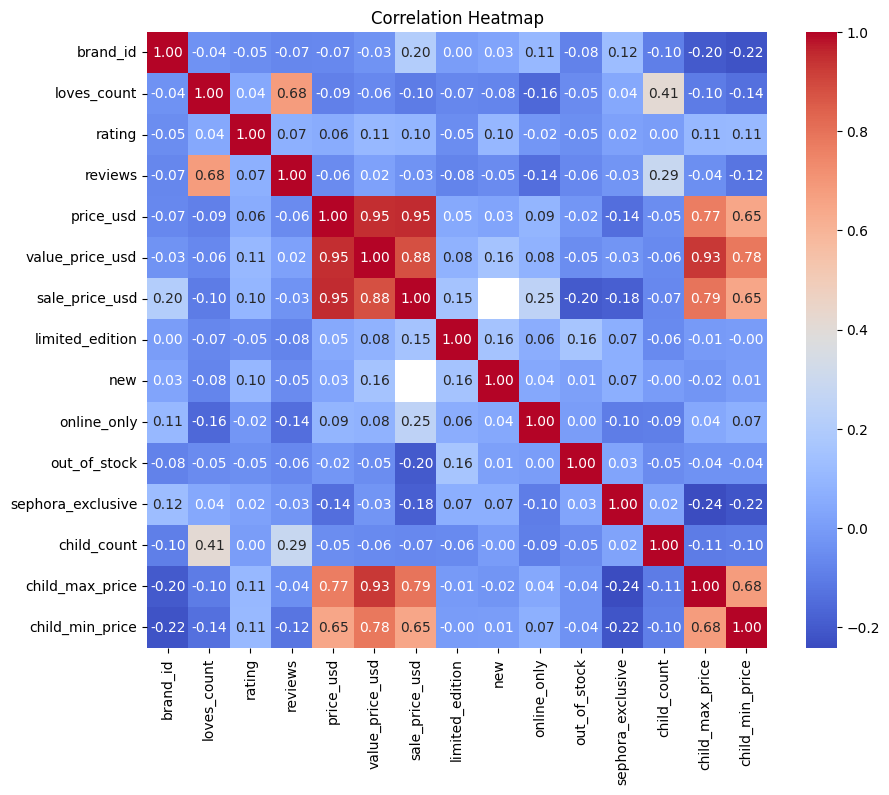

In [4]:
numeric_df = df_product.select_dtypes(include="number")

plt.figure(figsize=(10, 8))

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap")
plt.show()


In [5]:
numeric_df.head()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
0,6342,6320,3.6364,11.0,35.0,NaN,NaN,0,0,1,0,0,0,NaN,NaN
1,6342,3827,4.1538,13.0,195.0,NaN,NaN,0,0,1,0,0,2,85.0,30.0
2,6342,3253,4.2500,16.0,195.0,NaN,NaN,0,0,1,0,0,2,75.0,30.0
3,6342,3018,4.4762,21.0,195.0,NaN,NaN,0,0,1,0,0,2,75.0,30.0
4,6342,2691,3.2308,13.0,195.0,NaN,NaN,0,0,1,0,0,2,75.0,30.0


In [6]:
# Chuyển về dạng boolean để khi xử lý outlier không bị ảnh hưởng
df_product['limited_edition'] = df_product['limited_edition'].astype(bool)
df_product['new'] = df_product['new'].astype(bool)
df_product['online_only'] = df_product['online_only'].astype(bool)
df_product['out_of_stock'] = df_product['out_of_stock'].astype(bool)
df_product['sephora_exclusive'] = df_product['sephora_exclusive'].astype(bool)
df_product[['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive']]

,limited_edition,new,online_only,out_of_stock,sephora_exclusive
0,False,False,True,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False
...,...,...,...,...,...
8489,False,False,False,False,False
8490,False,False,False,False,False
8491,True,True,True,True,False
8492,True,True,True,False,False


## Categorical data

In [7]:
cat_df = df_product.select_dtypes(include="object")
cat_df.head()

,product_id,product_name,brand_name,size,variation_type,variation_value,variation_desc,ingredients,highlights,primary_category,secondary_category,tertiary_category
0,P473671,Fragrance Discovery Set,19-69,NaN,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...","['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets
1,P473668,La Habana Eau de Parfum,19-69,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume
2,P473662,Rainbow Bar Eau de Parfum,19-69,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume
3,P473660,Kasbah Eau de Parfum,19-69,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume
4,P473658,Purple Haze Eau de Parfum,19-69,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume


# Merge all data

In [16]:
# Tìm những cột chung giữa 2 data df_product và df_review
cols_to_use = df_product.columns.difference(df_review.columns)
cols_to_use = list(cols_to_use)
cols_to_use.append('product_id')
print(cols_to_use)

['brand_id', 'child_count', 'child_max_price', 'child_min_price', 'highlights', 'ingredients', 'limited_edition', 'loves_count', 'new', 'online_only', 'out_of_stock', 'primary_category', 'reviews', 'sale_price_usd', 'secondary_category', 'sephora_exclusive', 'size', 'tertiary_category', 'value_price_usd', 'variation_desc', 'variation_type', 'variation_value', 'product_id']


In [17]:
# Both dataset have the same columns of product_id, so we can merge them on this column
df = pd.merge(df_review, df_product[cols_to_use], how='outer', on=['product_id', 'product_id'])
df.shape

(1100554, 40)

In [18]:
df.head()

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,brand_id,child_count,child_max_price,child_min_price,highlights,ingredients,limited_edition,loves_count,new,online_only,out_of_stock,primary_category,reviews,sale_price_usd,secondary_category,sephora_exclusive,size,tertiary_category,value_price_usd,variation_desc,variation_type,variation_value
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P01018539,NaN,NaN,NaN,6332,0,NaN,NaN,"['Matte Finish', 'Waterproof', 'Long-wearing',...","['Water, Methylpropandiol, Styrene/Acrylates C...",False,13625,False,False,False,Makeup,159.0,NaN,Eye,True,0.04 oz/ 1.2 mL,Eyeliner,NaN,black,Size,0.04 oz/ 1.2 mL
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P02318798,NaN,NaN,NaN,6332,0,NaN,NaN,NaN,"['Metallic 1, Metallic 2:', 'Mica, Isostearyl ...",False,25738,False,False,False,Makeup,96.0,NaN,Eye,True,12 x 0.03 oz/ 1 g,Eye Palettes,NaN,NaN,Size,12 x 0.03 oz/ 1 g
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P04141879,NaN,NaN,NaN,6317,0,NaN,NaN,"['Vegan', 'Best for Dry, Combo, Normal Skin']",NaN,False,98192,False,False,False,Makeup,490.0,NaN,Brushes & Applicators,True,NaN,Face Brushes,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P04456664,NaN,NaN,NaN,6332,2,30.0,30.0,"['Light Coverage', 'Matte Finish', 'Pressed Po...","['Octyldodecanol, Polyethylene, Isohexadecane,...",False,29675,False,False,False,Makeup,111.0,NaN,Eye,True,NaN,Eye Primer,NaN,NaN,Color,Medium
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P04546871,NaN,NaN,NaN,6200,0,NaN,NaN,NaN,"['Hydrogenated Polyisobutene, Isododecane, Eth...",True,161689,False,False,False,Bath & Body,819.0,29.5,Body Moisturizers,False,3 oz/ 90 mL,Body Lotions & Body Oils,NaN,sparkling copper,Color,Cognac Candy


In [19]:
df.columns

Index(['author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd', 'brand_id',
       'child_count', 'child_max_price', 'child_min_price', 'highlights',
       'ingredients', 'limited_edition', 'loves_count', 'new', 'online_only',
       'out_of_stock', 'primary_category', 'reviews', 'sale_price_usd',
       'secondary_category', 'sephora_exclusive', 'size', 'tertiary_category',
       'value_price_usd', 'variation_desc', 'variation_type',
       'variation_value'],
      dtype='object')

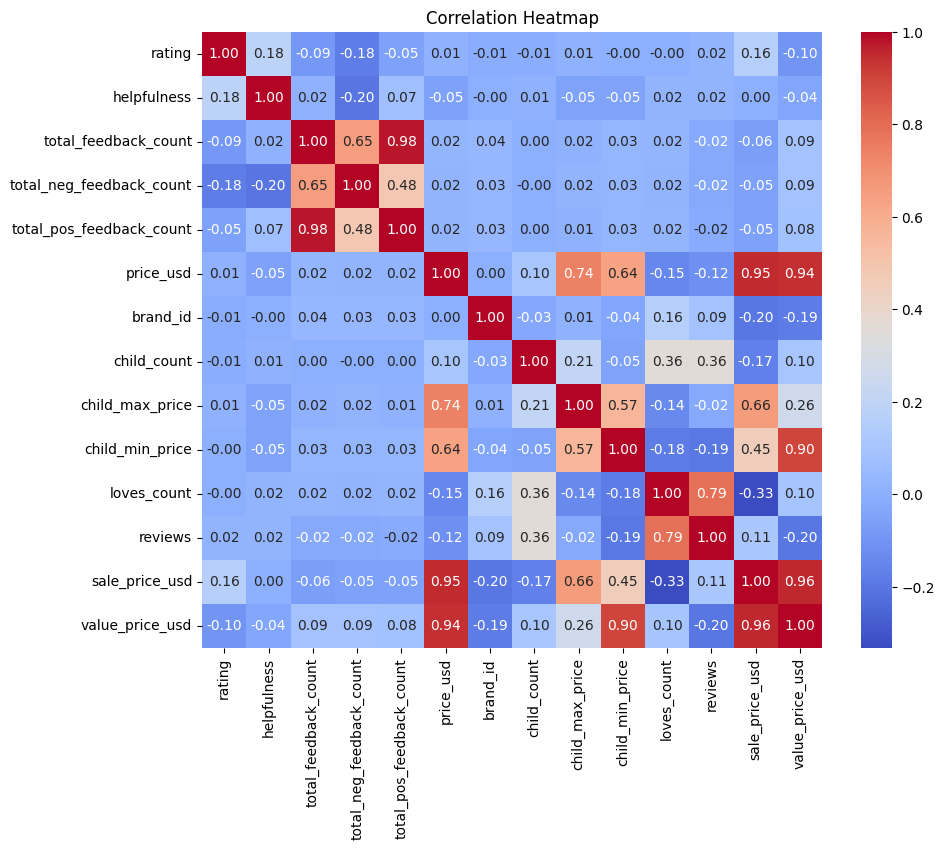

In [20]:
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(10, 8))

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap")
plt.show()

### Duplicate

In [21]:
df.duplicated().sum()

224

In [22]:
df_dup = df[df.duplicated()]
df_dup

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,brand_id,child_count,child_max_price,child_min_price,highlights,ingredients,limited_edition,loves_count,new,online_only,out_of_stock,primary_category,reviews,sale_price_usd,secondary_category,sephora_exclusive,size,tertiary_category,value_price_usd,variation_desc,variation_type,variation_value
3906,6007590540,5.0,True,NaN,0.0,0.0,0.0,2014-05-05,Makes your face soft and it does not dry your ...,Gr8 product!!,NaN,NaN,NaN,NaN,P122661,7 Day Face Scrub Cream Rinse-Off Formula,CLINIQUE,26.0,1254,0,NaN,NaN,NaN,"['Water, Tridecyl Stearate, Tridecyl Trimellit...",False,16656,False,False,False,Skincare,810.0,NaN,Cleansers,False,3.4 oz/ 100 mL,Exfoliators,NaN,NaN,Size,3.4 oz/ 100 mL
3909,6007590540,5.0,True,0.000000,1.0,1.0,0.0,2014-05-05,Makes your face soft and it does not dry your ...,Gr8 product!!,NaN,NaN,NaN,NaN,P122661,7 Day Face Scrub Cream Rinse-Off Formula,CLINIQUE,26.0,1254,0,NaN,NaN,NaN,"['Water, Tridecyl Stearate, Tridecyl Trimellit...",False,16656,False,False,False,Skincare,810.0,NaN,Cleansers,False,3.4 oz/ 100 mL,Exfoliators,NaN,NaN,Size,3.4 oz/ 100 mL
3910,6007590540,5.0,True,0.000000,1.0,1.0,0.0,2014-05-05,Makes your face soft and it does not dry your ...,Gr8 product!!,NaN,NaN,NaN,NaN,P122661,7 Day Face Scrub Cream Rinse-Off Formula,CLINIQUE,26.0,1254,0,NaN,NaN,NaN,"['Water, Tridecyl Stearate, Tridecyl Trimellit...",False,16656,False,False,False,Skincare,810.0,NaN,Cleansers,False,3.4 oz/ 100 mL,Exfoliators,NaN,NaN,Size,3.4 oz/ 100 mL
3911,6007590540,5.0,True,0.000000,2.0,2.0,0.0,2014-05-05,Makes your face soft and it does not dry your ...,Gr8 product!!,NaN,NaN,NaN,NaN,P122661,7 Day Face Scrub Cream Rinse-Off Formula,CLINIQUE,26.0,1254,0,NaN,NaN,NaN,"['Water, Tridecyl Stearate, Tridecyl Trimellit...",False,16656,False,False,False,Skincare,810.0,NaN,Cleansers,False,3.4 oz/ 100 mL,Exfoliators,NaN,NaN,Size,3.4 oz/ 100 mL
3912,6007590540,5.0,True,0.000000,2.0,2.0,0.0,2014-05-05,Makes your face soft and it does not dry your ...,Gr8 product!!,NaN,NaN,NaN,NaN,P122661,7 Day Face Scrub Cream Rinse-Off Formula,CLINIQUE,26.0,1254,0,NaN,NaN,NaN,"['Water, Tridecyl Stearate, Tridecyl Trimellit...",False,16656,False,False,False,Skincare,810.0,NaN,Cleansers,False,3.4 oz/ 100 mL,Exfoliators,NaN,NaN,Size,3.4 oz/ 100 mL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043062,30715138098,4.0,True,NaN,0.0,0.0,0.0,2022-08-10,Beautiful texture and applies nicely and seems...,Very nice,fair,green,dry,black,P501254,Watermelon Glow AHA Night Treatment,Glow Recipe,40.0,6189,1,21.0,21.0,"['Good for: Dullness/Uneven Texture', 'Hyaluro...","['Water/Aqua/Eau, Propanediol, C9-12 Alkane, G...",False,46292,False,False,False,Skincare,730.0,NaN,Treatments,True,2.02 oz / 60 mL,Facial Peels,NaN,NaN,Size,2.02 oz / 60 mL
1059434,41763741200,5.0,True,0.545455,11.0,5.0,6.0,2022-12-27,I recently had the opportunity to add this moi...,Perfect for dry skin,NaN,blue,combination,NaN,P503891,Green Tea Hyaluronic Acid Hydrating Moisturizer,innisfree,29.0,6295,0,NaN,NaN,"['Hyaluronic Acid', 'Hydrating', 'Without Mine...","['Water/Aqua/Eau, Propanediol, Glycerin, Methy...",False,13619,False,False,False,Skincare,411.0,NaN,Moisturizers,False,1.7 oz / 50 mL,Moisturizers,NaN,NaN,Size,1.7 oz / 50 mL
1059491,21296783404,5.0,True,NaN,0.0,0.0,0.0,2022-12-22,"I received this as a free product from Topbox,...",Keeps skin moisturized and smooth,NaN,brown,combination,black,P503891,Green Tea Hyaluronic Acid Hydrating Moisturizer,innisfree,29.0,6295,0,NaN,NaN,"['Hyaluronic Acid', 'Hydrating', 'Without Mine...","['Water/Aqua/Eau, Propanediol, Glycerin, Methy...",False,13619,False,False,False,Skincare,411.0,NaN,Moisturizers,False,1.7 oz

We do not delete the duplicated rows since the information of each review from each customers can be the same and could reflect genuine user agreement.

### Missing value

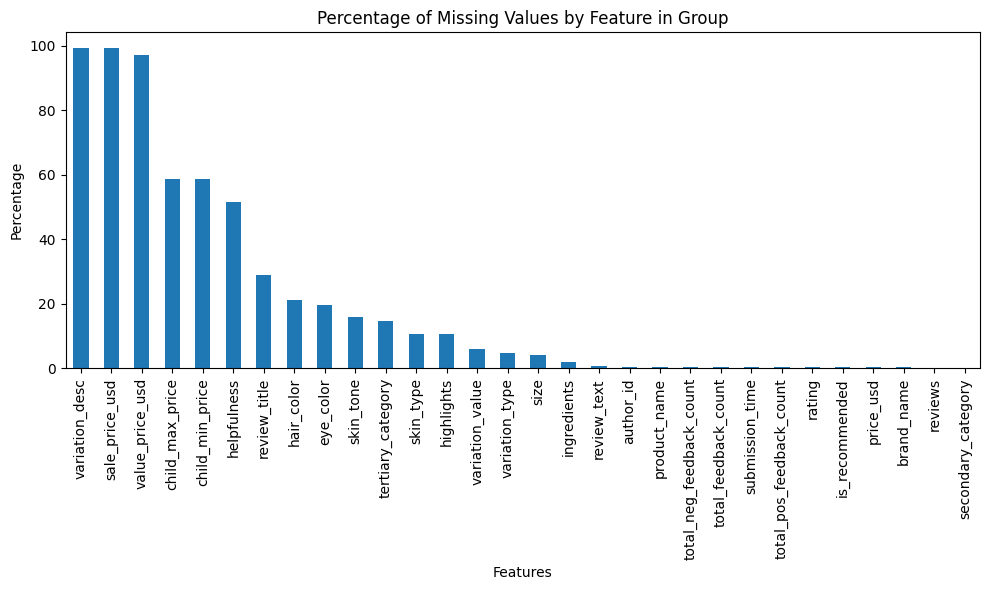

,Feature,Missing Count,Missing Percentage
variation_desc,variation_desc,1091034,99.134981
sale_price_usd,sale_price_usd,1090576,99.093366
value_price_usd,value_price_usd,1069365,97.166064
child_max_price,child_max_price,644796,58.588311
child_min_price,child_min_price,644796,58.588311
helpfulness,helpfulness,567735,51.586292
review_title,review_title,316797,28.785230
hair_color,hair_color,232911,21.163069
eye_color,eye_color,215771,19.605671
skin_tone,skin_tone,176682,16.053915


In [23]:
quantify_missing_data_by_group(df, df.columns)

Missing values may appear since the reviewers don't want to provide their information or a text review. Therefor, to ensure the integrity of the dataset, we drop the columns that have more than 80% of missing values and some columns that have high correlation with each other. By focus on more completing data, the model can enhance the reliability for the sentimental analysis. 

In [24]:
# These columns have a high percentage of missing values
cols = """variation_desc
sale_price_usd
value_price_usd
child_max_price
child_min_price
review_title"""
cols_list = cols.split("\n")
# Drop the columns
df.drop(columns=cols_list,axis=1,inplace=True)

In [25]:
df.shape

(1100554, 34)

We want to drop the columns that have the value of "review_text" is null since our project of sentiment analysis would focus on this "review_text" column

In [26]:
df[df['review_text'].isnull()]

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,brand_id,child_count,highlights,ingredients,limited_edition,loves_count,new,online_only,out_of_stock,primary_category,reviews,secondary_category,sephora_exclusive,size,tertiary_category,variation_type,variation_value
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P01018539,NaN,NaN,NaN,6332,0,"['Matte Finish', 'Waterproof', 'Long-wearing',...","['Water, Methylpropandiol, Styrene/Acrylates C...",False,13625,False,False,False,Makeup,159.0,Eye,True,0.04 oz/ 1.2 mL,Eyeliner,Size,0.04 oz/ 1.2 mL
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P02318798,NaN,NaN,NaN,6332,0,NaN,"['Metallic 1, Metallic 2:', 'Mica, Isostearyl ...",False,25738,False,False,False,Makeup,96.0,Eye,True,12 x 0.03 oz/ 1 g,Eye Palettes,Size,12 x 0.03 oz/ 1 g
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P04141879,NaN,NaN,NaN,6317,0,"['Vegan', 'Best for Dry, Combo, Normal Skin']",NaN,False,98192,False,False,False,Makeup,490.0,Brushes & Applicators,True,NaN,Face Brushes,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P04456664,NaN,NaN,NaN,6332,2,"['Light Coverage', 'Matte Finish', 'Pressed Po...","['Octyldodecanol, Polyethylene, Isohexadecane,...",False,29675,False,False,False,Makeup,111.0,Eye,True,NaN,Eye Primer,Color,Medium
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P04546871,NaN,NaN,NaN,6200,0,NaN,"['Hydrogenated Polyisobutene, Isododecane, Eth...",True,161689,False,False,False,Bath & Body,819.0,Body Moisturizers,False,3 oz/ 90 mL,Body Lotions & Body Oils,Color,Cognac Candy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P9889,NaN,NaN,NaN,3990,2,"['Vegan', 'Natural Finish', 'Good for: Pores',...","['Cyclopentasiloxane, Dimethicone, Dimethicone...",False,239217,False,False,False,Makeup,7492.0,Face,False,1 oz/ 30 mL,Face Primer,Size,1 oz/ 30 mL
1099771,1874240511,1.0,False,0.076923,13.0,12.0,1.0,2019-08-20,NaN,light,brown,normal,black,P9940,Essential-C Day Moisture Broad Spectrum SPF 30...,Murad,68.0,4164,0,"['Vitamin C', 'Without Phthalates', 'Best for ...","['Water, Butylene Glycol, Stearic Acid, Diisop...",False,24570,False,False,False,Skincare,829.0,Moisturizers,False,1.7 oz,Moisturizers,NaN,NaN
1100551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P99809,NaN,NaN,NaN,5648,0,"['Vegan', 'Natural Finish', 'Long-wearing', 'W...","['Synthetic Fluorphlogopite, Zinc Stearate, Po...",False,34847,False,False,False,Makeup,1145.0,Cheek,False,0.32 oz/ 9 g,Bronzer,Color,Park Ave Princess
1100552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P99901,NaN,NaN,NaN,1073,2,NaN,"['Isododecane, Cera Alba (Beeswax), Water, Eup...",False,45007,False,False,False,Makeup,2867.0,Eye,False,0.38 oz/ 11.5 mL,Mascara,Color,Catwalk Black


In [27]:
# Drop row with missing values from review_text
df.dropna(subset=['review_text'], inplace=True)
df.shape


(1092967, 34)

The "primary_category" column after dropping some high-percentage missing value columns appear to receive just one value which is "Skincare". This is understandable since we are focus more on Skincare product on this project. Therefore we drop this column since it's no longer helpful for training step.

In [30]:
df['primary_category'].value_counts()

primary_category
Skincare    1092967
Name: count, dtype: int64

In [31]:
# drop the column primary_category
df.drop(columns=['primary_category'], inplace=True)

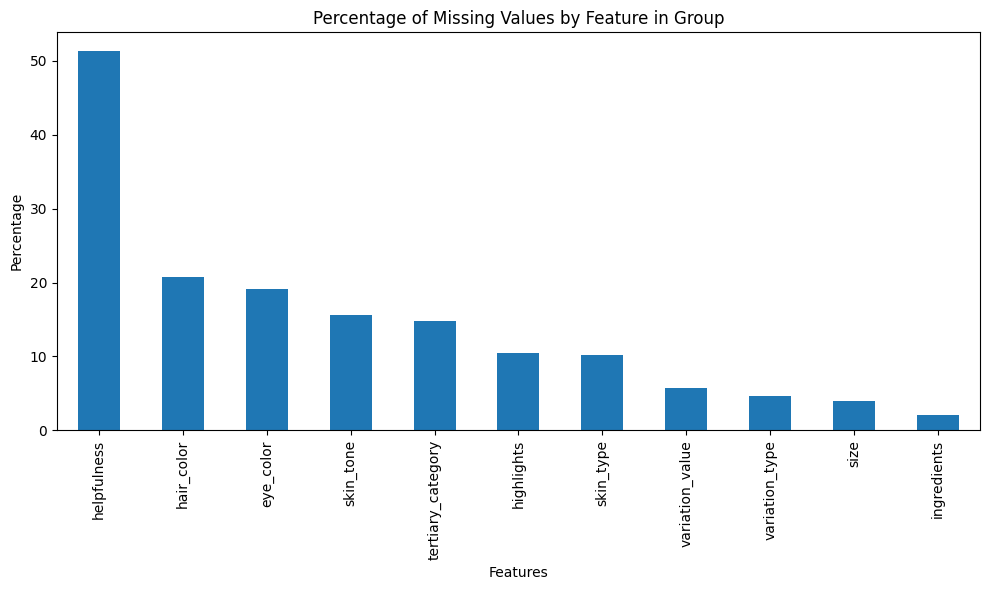

,Feature,Missing Count,Missing Percentage
helpfulness,helpfulness,560595,51.291119
hair_color,hair_color,226718,20.743353
eye_color,eye_color,209566,19.174046
skin_tone,skin_tone,170499,15.599648
tertiary_category,tertiary_category,161006,14.731094
highlights,highlights,113788,10.410927
skin_type,skin_type,111518,10.203236
variation_value,variation_value,63323,5.793679
variation_type,variation_type,51398,4.702612
size,size,43300,3.961693


In [28]:
quantify_missing_data_by_group(df, df.columns)

As you can see when the customers agree to recommend this product, they will tend to rate this product as helpful. Therefore we fill null of "helpfulness" column with 1 if the customer recommend this product and fill with 0 if they don't recommend it.

<Axes: xlabel='is_recommended', ylabel='helpfulness'>

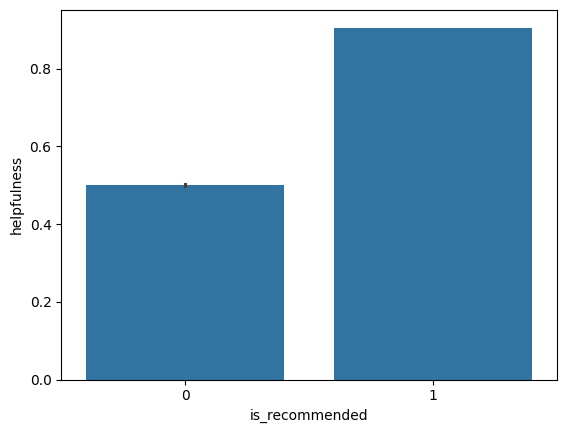

In [56]:
sns.barplot(df,y = df['helpfulness'],x=df['is_recommended'])

In [29]:
df['helpfulness'] = df.apply(
    lambda row: 0 if row['is_recommended'] == False and pd.isna(row['helpfulness']) else 
                (1 if row['is_recommended'] == True and pd.isna(row['helpfulness']) else row['helpfulness']),
    axis=1
)

The columns 'hair_color', 'eye_color', 'skin_tone', 'skin_type' is filled by "brand_id" since the customers tend to choose the brand based on their facial features to match with the function of each brand.

We fill 'No Size' and 'No Highlights' for missing value of 'size' and 'highlights' columns to keep the intergrity of the data.

'variation_value', 'tertiary_category' columns is filled by "brand_id" too because how they sort the category and the variation value is based on the brand.

Also, 'tertiary_category' and 'ingredients' is related to 'secondary_category' therefore it is filled by grouping 'secondary_category'. 

Similarly, "variation_value" show the same value with the size from each product so we fill null by the 'size' too. While 'variation_type' depends on the 'variation_value' so the missing value is filled by 'variation_value'.



In [ ]:
# List of columns with missing values
miss_cols = ['hair_color', 'eye_color', 'skin_tone', 'skin_type', 'variation_value', 'tertiary_category']

def fill_missing_with_mode(group):
    if group.isnull().any():  
        mode_value = group.mode()
        if not mode_value.empty:
            return group.fillna(mode_value[0])  
    return group  

# Apply the function to each of the columns
for col in miss_cols:
    df[col] = df.groupby('brand_id')[col].transform(fill_missing_with_mode)


In [36]:
df['size'] = df['size'].fillna('No Size')
df['highlights'] = df['highlights'].fillna('No Highlights')

In [34]:
df['tertiary_category'] = df.groupby('secondary_category')['tertiary_category'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

In [37]:
df['variation_value'] = df.groupby('size')['variation_value'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

In [35]:
df['ingredients'] = df.groupby('secondary_category')['ingredients'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

In [38]:
df['variation_type'] = df.groupby('variation_value')['variation_type'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

In [39]:
df.isnull().sum()  

author_id                   0
rating                      0
is_recommended              0
helpfulness                 0
total_feedback_count        0
total_neg_feedback_count    0
total_pos_feedback_count    0
submission_time             0
review_text                 0
skin_tone                   0
eye_color                   0
skin_type                   0
hair_color                  0
product_id                  0
product_name                0
brand_name                  0
price_usd                   0
brand_id                    0
child_count                 0
highlights                  0
ingredients                 0
limited_edition             0
loves_count                 0
new                         0
online_only                 0
out_of_stock                0
reviews                     0
secondary_category          0
sephora_exclusive           0
size                        0
tertiary_category           0
variation_type              0
variation_value             0
dtype: int

### Outliers

In [40]:
df.columns

Index(['author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id',
       'product_name', 'brand_name', 'price_usd', 'brand_id', 'child_count',
       'highlights', 'ingredients', 'limited_edition', 'loves_count', 'new',
       'online_only', 'out_of_stock', 'reviews', 'secondary_category',
       'sephora_exclusive', 'size', 'tertiary_category', 'variation_type',
       'variation_value'],
      dtype='object')

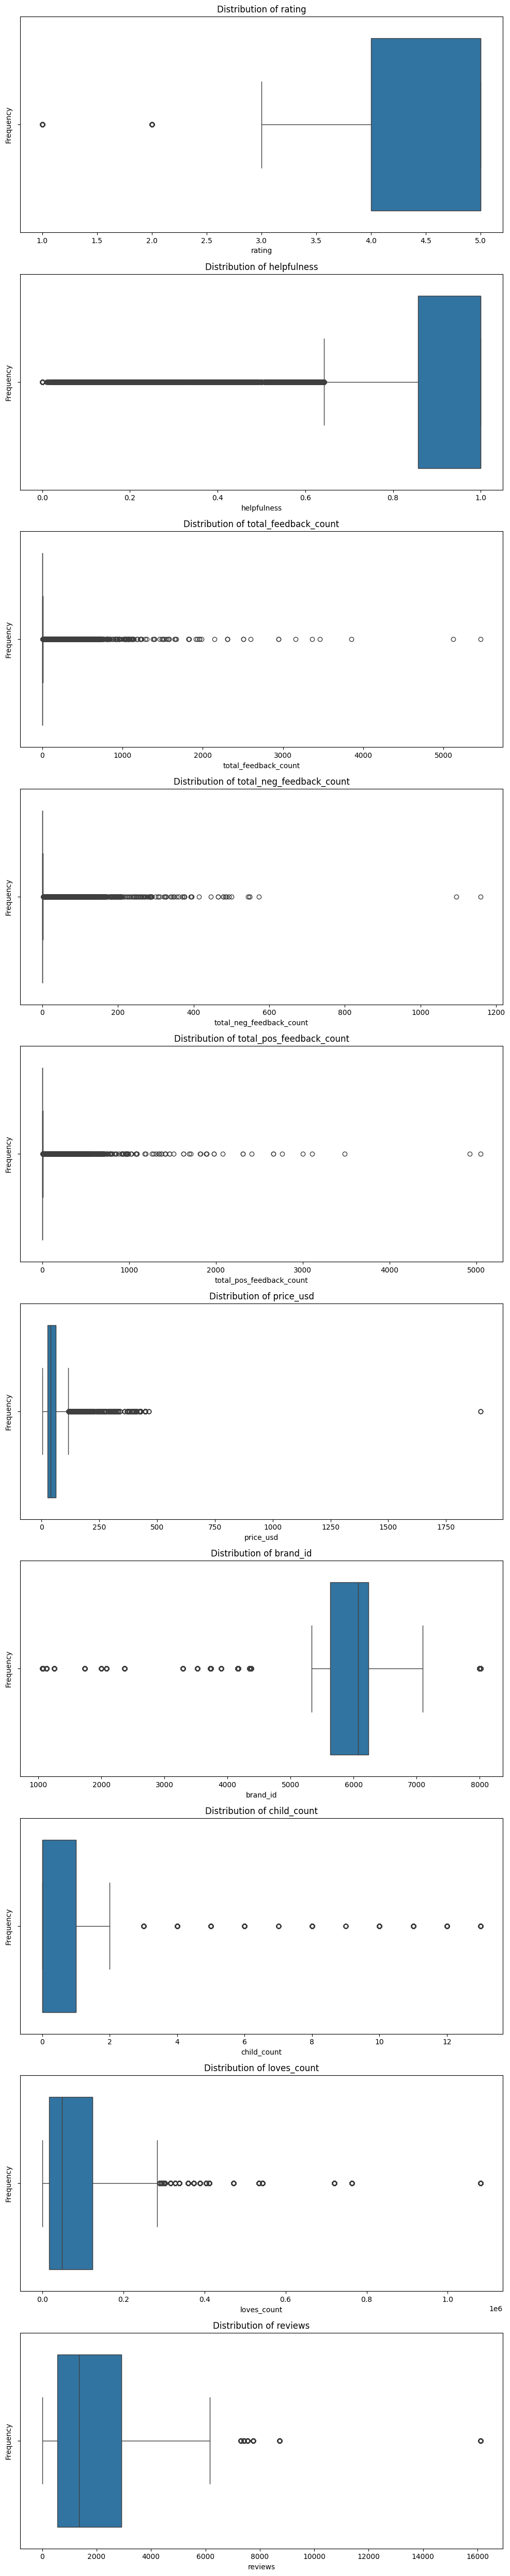

In [41]:
df_numeric = df.select_dtypes(include="number")

num_cols = len(df_numeric.columns)
fig, axes = plt.subplots(num_cols, 1, figsize=(10, num_cols * 5))

if num_cols == 1:
    axes = [axes]
    
for i, col in enumerate(df_numeric.columns):
    sns.boxplot(x=df_numeric[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

We want to see if there are any 'total_neg_feedback_count' or 'total_pos_feedback_count' value that surpass the 'total_feedback_count' value

In [42]:
df[df['total_neg_feedback_count']+df['total_pos_feedback_count']>df['total_feedback_count']]

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,brand_id,child_count,highlights,ingredients,limited_edition,loves_count,new,online_only,out_of_stock,reviews,secondary_category,sephora_exclusive,size,tertiary_category,variation_type,variation_value


The 1900 value in 'price_used' column is an outlier, we can drop it

In [43]:
df[df['price_usd']==1900]

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,brand_id,child_count,highlights,ingredients,limited_edition,loves_count,new,online_only,out_of_stock,reviews,secondary_category,sephora_exclusive,size,tertiary_category,variation_type,variation_value
1046885,1885324769,1.0,False,1.000000,9.0,0.0,9.0,2023-02-25,Bought this online and the remote isn’t workin...,tan,brown,dry,black,P502216,Shani Darden by Déesse PRO LED Light Mask,Shani Darden Skin Care,1900.0,6314,0,"['Good for: Loss of firmness', 'Good for: Anti...","['Water, Glycerin, PEG-400, Hydrogen Peroxide,...",False,4154,False,True,False,4.0,High Tech Tools,True,No Size,Anti-Aging,Size,0.3 oz/ 10 mL
1046886,1062321211,4.0,True,0.777778,27.0,6.0,21.0,2023-01-28,I have been using this mask for two weeks and ...,lightMedium,hazel,combination,brown,P502216,Shani Darden by Déesse PRO LED Light Mask,Shani Darden Skin Care,1900.0,6314,0,"['Good for: Loss of firmness', 'Good for: Anti...","['Water, Glycerin, PEG-400, Hydrogen Peroxide,...",False,4154,False,True,False,4.0,High Tech Tools,True,No Size,Anti-Aging,Size,0.3 oz/ 10 mL
1046887,1486490323,5.0,True,0.700000,10.0,3.0,7.0,2023-01-21,Great for discoloration/ age spots. Must simpl...,light,hazel,oily,blonde,P502216,Shani Darden by Déesse PRO LED Light Mask,Shani Darden Skin Care,1900.0,6314,0,"['Good for: Loss of firmness', 'Good for: Anti...","['Water, Glycerin, PEG-400, Hydrogen Peroxide,...",False,4154,False,True,False,4.0,High Tech Tools,True,No Size,Anti-Aging,Size,0.3 oz/ 10 mL
1046888,1997394056,5.0,True,0.806452,31.0,6.0,25.0,2023-01-17,This is so worth the money. This is a professi...,light,brown,combination,brown,P502216,Shani Darden by Déesse PRO LED Light Mask,Shani Darden Skin Care,1900.0,6314,0,"['Good for: Loss of firmness', 'Good for: Anti...","['Water, Glycerin, PEG-400, Hydrogen Peroxide,...",False,4154,False,True,False,4.0,High Tech Tools,True,No Size,Anti-Aging,Size,0.3 oz/ 10 mL


In [44]:
# Drop row with price_use = 1900
df.drop(df[df['price_usd'] == 1900].index, inplace=True)

Other columns with outliers seem to be their own pattern since the customer will have their own rating and rview range so we keep the outliers.

### Class imbalance

In [45]:
df['is_recommended'].value_counts()

is_recommended
True     944950
False    148013
Name: count, dtype: int64

In [46]:
df['is_recommended'] = df['is_recommended'].astype(int)

C:\Users\HI\AppData\Local\Temp\ipykernel_26256\3968428715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_recommended', palette='Set2')


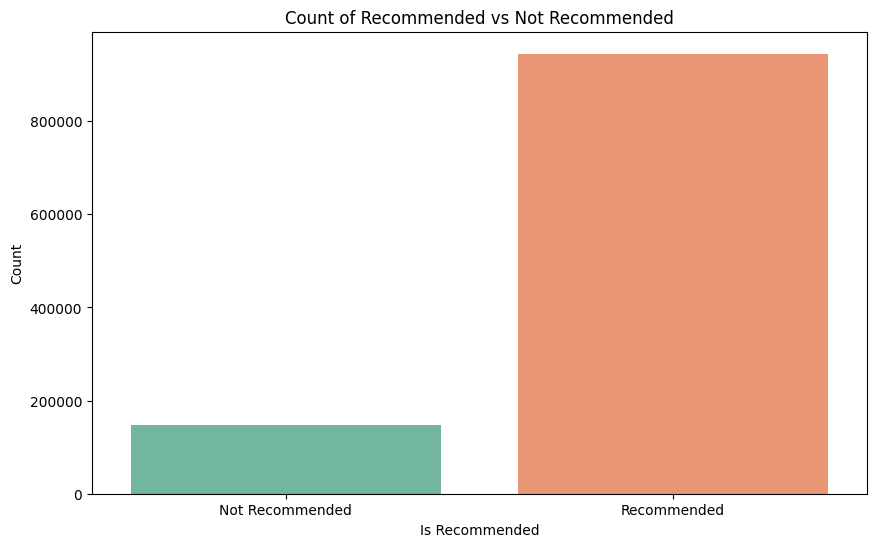

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='is_recommended', palette='Set2')
plt.title('Count of Recommended vs Not Recommended')
plt.xlabel('Is Recommended')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Recommended', 'Recommended'])
plt.show()

We can see the imbalance of the columns is_recommended where reviewers decide should recommend this product or not. 
To deal with this issue, we have many solution:
-  Over-sampling which increases the number of instances in the minority class, either by duplicating existing samples or generating synthetic data, to align with the majority class's size. But may provide more duplicates of the minority class.
- Under-sampling which reduce the number of majority class but may result in the loss of valuable information.

Therefore, we use a method that combine both these methods. This method merge the positive (Recommended) and negative (Not recommended) class into a single DataFrame and creating a balanced dataset for both classes.

In [48]:
df.shape

(1092963, 33)

In [49]:
# # Sample equal number of instances for each class
not_rec=  df[df['is_recommended'] == 0]
print('No. of Not Recommended class:' , len(not_rec))
rec =  df[df['is_recommended'] == 1].sample(len(not_rec))
print('No. of taken samples of Positive class', len(rec))

No. of Not Recommended class: 148013
No. of taken samples of Positive class 148013


In [50]:
from sklearn.utils import shuffle
df = pd.concat([not_rec, rec], ignore_index=True)
df = shuffle(df, random_state=42)
df.shape

(296026, 33)

C:\Users\HI\AppData\Local\Temp\ipykernel_26256\1586931231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_recommended', palette='Set2')


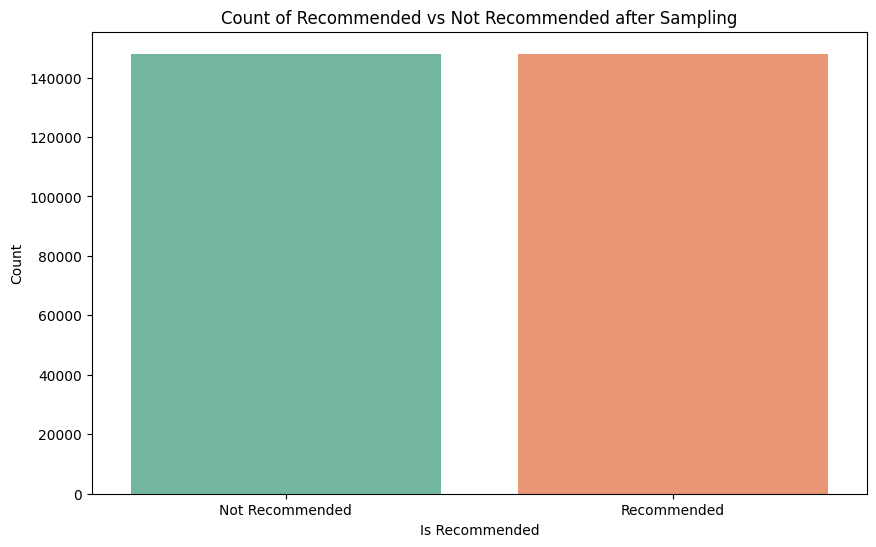

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='is_recommended', palette='Set2')
plt.title('Count of Recommended vs Not Recommended after Sampling')
plt.xlabel('Is Recommended')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Recommended', 'Recommended'])
plt.show()

In [52]:
df['is_recommended'].value_counts()

is_recommended
0    148013
1    148013
Name: count, dtype: int64

In [53]:
# # Converting to integer
df['limited_edition'] = df['limited_edition'].astype(int)
df['new'] = df['new'].astype(int)
df['online_only'] = df['online_only'].astype(int)
df['out_of_stock'] = df['out_of_stock'].astype(int)
df[['limited_edition', 'new', 'online_only', 'out_of_stock']]

,limited_edition,new,online_only,out_of_stock
83522,0,0,0,0
233090,0,0,0,0
255104,0,0,1,0
116228,0,0,0,0
105693,0,0,0,1
...,...,...,...,...
119879,0,0,0,0
259178,0,0,0,0
131932,1,0,0,0
146867,0,1,0,1


In [54]:
df.shape

(296026, 33)

In [55]:
df.to_csv('Data/df_final.csv', index=False)